# Master Measles Epidemic Py
----

#### Project Description
* Numerous media outlets ranging in credibility have reported concerns over the rise of Measles, previously thought contained by herd immunization within the United States population. This project seeks to first validate the reports by media, then investigate the cause of the increased cases, provide additional information regarding the effectiveness of immunization and factors surrounding thespread and prevention of measles.  And finally, provide a recommendation based onthe findings

In [1]:
# Dependencies and Setup
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# # Import API key
# from api_keys import api_key



## Question 1: Is there a rise in measles cases in the US?

In [2]:
# Jam's Code Here:



In [3]:
# Amanda's Code Here:



## Question 2: How does the immunization rate look like in the US?

In [4]:
###################################################
# Rika's Code Here:

# Part 1: Data Retrieval and Cleaning:
###################################################

# File to load:
##RF: CHANGE WHEN MOVING TO PRODUCTION:  %^&*%$#%^&%#%^&*^%#%^&**&^%$%^&*(&^%$#%^&*(&^%$#$%^&*&^%$#$%^&*(&^%$#%^&$#%$)))
immunization_file = '../Resources/Vaccinations_95-17_Reformatted.xlsx'
states_file = '../Resources/states.csv'

# Read in the states list:
states_df = pd.read_csv(states_file)
states_df.head()

# Read in the immunization file:
raw_imm_df = pd.read_excel(immunization_file)
raw_imm_df.head()



,Names,1995,LL,UL,CI,SAMPLE SIZE,TARGET,1996,LL.1,UL.1,...,UL.21,CI.21,SAMPLE SIZE.21,TARGET.21,2017,LL.22,UL.22,CI.22,SAMPLE SIZE.22,TARGET.22
0,Alabama,88.9,83.5,92.7,(±4.5),419.0,90.0,90.1,85.7,93.3,...,94.8,(±4.8),249.0,90.0,92.3,87.5,95.4,(±3.8),295.0,90.0
1,AL-Jefferson County,93.7,88.7,96.6,(±3.8),213.0,90.0,92.9,88.5,95.7,...,NaN,NaN,NaN,90.0,NaN,NaN,NaN,NaN,NaN,90.0
2,AL-Rest of State,88.0,81.6,92.3,(±5.3),206.0,90.0,89.6,84.3,93.2,...,NaN,NaN,NaN,90.0,NaN,NaN,NaN,NaN,NaN,90.0
3,Alaska,89.9,84.2,93.7,(±4.7),195.0,90.0,83.7,78.0,88.1,...,89.8,(±4.8),288.0,90.0,89.3,84.6,92.7,(±4),251.0,90.0
4,Arizona,82.7,77.3,87.1,(±4.8),374.0,90.0,85.2,81.2,88.4,...,92.3,(±5.7),230.0,90.0,91.7,87.0,94.8,(±3.9),265.0,90.0


In [5]:
# Pull only necessary columns:
condensed_imm_df = raw_imm_df[['Names', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
                             '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
                             '2015', '2016', '2017']]
condensed_imm_df.head()

# Reset index to prep for the state row retrieval:
i_condensed_imm_df = condensed_imm_df.set_index('Names')
i_condensed_imm_df

# Retrieve only rows with states (not counties)
imm_df = i_condensed_imm_df.loc[states_df['State'], :]

# Verify all columns have data:
imm_df.count()

# Validate work:
# imm_df
imm_df.head()


,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Names,,,,,,,,,,,,,,,,,,,,,
Alabama,88.9,90.1,93.7,95.1,89.3,86.8,94.3,91.6,91.2,91.8,...,93.6,95.4,95.4,94.0,93.1,89.7,92.0,95.2,91.1,92.3
Alaska,89.9,83.7,86.8,89.7,90.9,87.9,87.8,88.7,90.7,89.7,...,88.4,85.2,88.4,90.8,86.2,90.5,90.2,89.7,85.6,89.3
Arizona,82.7,85.2,88.0,87.7,87.1,88.1,88.8,88.9,91.5,92.9,...,92.2,90.8,87.7,86.7,88.3,91.4,84.1,90.6,87.7,91.7
Arkansas,90.8,85.3,92.2,87.6,85.1,88.0,89.1,92.8,90.6,94.6,...,92.2,81.8,90.5,93.7,92.3,88.3,89.1,90.2,92.1,92.6
California,90.2,90.5,88.4,91.0,91.8,89.4,90.8,90.4,92.8,93.1,...,92.7,89.8,91.4,91.0,91.5,90.7,90.5,92.8,89.3,92.9


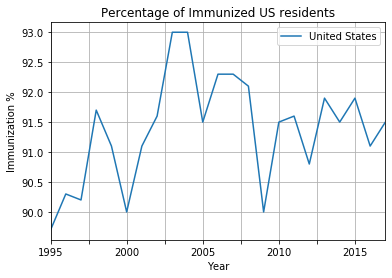

In [123]:
###################################################
# PERCENTAGE OF IMMUNIZATION IN THE US:
###################################################
# Line graph with the total vaccinated as the y axis; the years as the x axis


# Create a separate dataframe for US as a country: 
usa_imm = i_condensed_imm_df.loc['United States', :]
usa_imm.head()

# Define the x axis:
imm_x_axis = np.arange(1995, 2020, 1)

# Line Graph of the US immunization rate as a country from the CDC:
CDC_USA_IMMUNIZATIONS = usa_imm.plot(x = imm_x_axis)
CDC_USA_IMMUNIZATIONS.set_xlabel("Year")
CDC_USA_IMMUNIZATIONS.set_ylabel("Immunization %")
CDC_USA_IMMUNIZATIONS.set_title("Percentage of Immunized US residents")
CDC_USA_IMMUNIZATIONS.legend()
CDC_USA_IMMUNIZATIONS.grid()
plt.savefig('../Output/CDC_USA_Immunizations.png')


In [76]:
###################################################
# PERCENTAGE OF IMMUNIZATION IN THE US - PER STATE
###################################################

# imm_yrs = ['1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
#            '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
#            '2015', '2016', '2017']

# TOP 10 MEASLES OUTBREAK STATES:
NY_IMM = imm_df.loc['New York']
CA_IMM = imm_df.loc['California']
WA_IMM = imm_df.loc['Washington']
AZ_IMM = imm_df.loc['Arizona']
IL_IMM = imm_df.loc['Illinois']

MN_IMM = imm_df.loc['Minnesota']
UT_IMM = imm_df.loc['Utah']
NC_IMM = imm_df.loc['North Carolina']
TX_IMM = imm_df.loc['Texas']
OH_IMM = imm_df.loc['Ohio']

# CURIOUS:
HI_IMM = imm_df.loc['Hawaii']
DC_IMM = imm_df.loc['District of Columbia']
DE_IMM = imm_df.loc['Delaware']
NJ_IMM = imm_df.loc['New Jersey']
TN_IMM = imm_df.loc['Tennessee']


###################################################
# fqn to build the line charts per state:
###################################################
def PrettyPicture(state_df, state_name):  
    state_plot = state_df.plot()
    state_plot.set_xlabel("Year")
    state_plot.set_ylabel("Immunization %")
    state_plot.set_title(f"Percentage of Immunization in {state_name}")
    state_plot.legend(loc = 'best')
    state_plot.grid()
    plt.savefig(f"../Output/CDC_{state_name}_Immunization.png")
    plt.clf()

PrettyPicture(NY_IMM, 'New York')
PrettyPicture(CA_IMM, 'California')
PrettyPicture(WA_IMM, 'Washington')
PrettyPicture(AZ_IMM, 'Arizona')
PrettyPicture(IL_IMM, 'Illinois')

PrettyPicture(MN_IMM, 'Minnesota')
PrettyPicture(UT_IMM, 'Utah')
PrettyPicture(NC_IMM, 'North Carolina')
PrettyPicture(TX_IMM, 'Texas')
PrettyPicture(OH_IMM, 'Ohio')

# CURIOUS:
PrettyPicture(HI_IMM, 'Hawaii')
PrettyPicture(DC_IMM, 'District of Columbia')
PrettyPicture(DE_IMM, 'Delaware')
PrettyPicture(NJ_IMM, 'New Jersey')
PrettyPicture(TN_IMM, 'Tennessee')



<Figure size 432x288 with 0 Axes>

In [122]:
# Bar graph with the total vaccinated as the y axis; the states as the x axis - 1 chart per year (?)


###################################################
# Top 5 States with Measles Outbreaks
###################################################

# 2017:
reset_imm_df = imm_df.reset_index()
reset_imm_df


###################################################
# fqn to build bar charts for different years:
###################################################
def BarChartMaker(top5_df, year):
    TOP5_IMM = top5_df.loc[(top5_df['Names']=='New York') | (top5_df['Names']=='California') |
                           (top5_df['Names']=='Washington') | (top5_df['Names']=='Arizona') |
                           (top5_df['Names']=='Illinois')
                           , ('Names', year)]

    Top5_imm_barchart = TOP5_IMM.plot(kind = 'bar', title = 'Immunization % for Top 5 States with Measles')
    Top5_imm_barchart.set_xticklabels(TOP5_IMM['Names'], rotation = 45)
    Top5_imm_barchart.set_xlabel('States')
    Top5_imm_barchart.set_ylabel('Immunization %')
    Top5_imm_barchart.set_ylim(80, 100)
    Top5_imm_barchart.yaxis.grid()
    plt.savefig(f"../Output/CDC_Top5_Immunization_{year}.png")
    plt.clf()

BarChartMaker(reset_imm_df, '2017')   
BarChartMaker(reset_imm_df, '2016')
BarChartMaker(reset_imm_df, '2015')
BarChartMaker(reset_imm_df, '2014')
BarChartMaker(reset_imm_df, '2010')
BarChartMaker(reset_imm_df, '1997')


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

## Question 3: Is there a rise in measles cases in the rest of the World?

In [12]:
#Chinedu's Code Here:



#### Total Measles Cases over the years 20xx - 2019 in the US

In [13]:
# Line graph with the total cases as the y axis; the years as the x axis



#### Total Measles Cases per State for year 20xx (?) in the US

In [14]:
# Bar graph with the total cases as the y axis; the states as the x axis - 1 chart per year (?)



#### Total Vaccinated over the years 1995 - 2017 in the US

In [15]:
# Line graph with the total vaccinated as the y axis; the years as the x axis



#### Total Vaccinated per State for year 20xx (?) in the US

In [16]:
# Bar graph with the total vaccinated as the y axis; the states as the x axis - 1 chart per year (?)



#### Total Measles Cases over the years 20xx - 2019 in the WORLD outside of US

In [17]:
# Line graph with the total cases from ALL COUNTRIES except USA as the y axis; the years as the x axis



#### Total Measles Cases per Top 5 Countries for year 20xx (?) 

In [18]:
# Bar graph with the total cases from the TOP 5 COUNTRIES as the y axis; 
# the TOP 5 COUNTRIES as the x axis - 1 chart per year (?)


### If we have time: 
### 1. heat map of all measles cases in the WORLD
### 2. scatter chart of measles cases vs vaccinated people - to check for correlation between them